In [88]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

In [4]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
PAdf = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
PAdf

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [6]:
PAdf.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

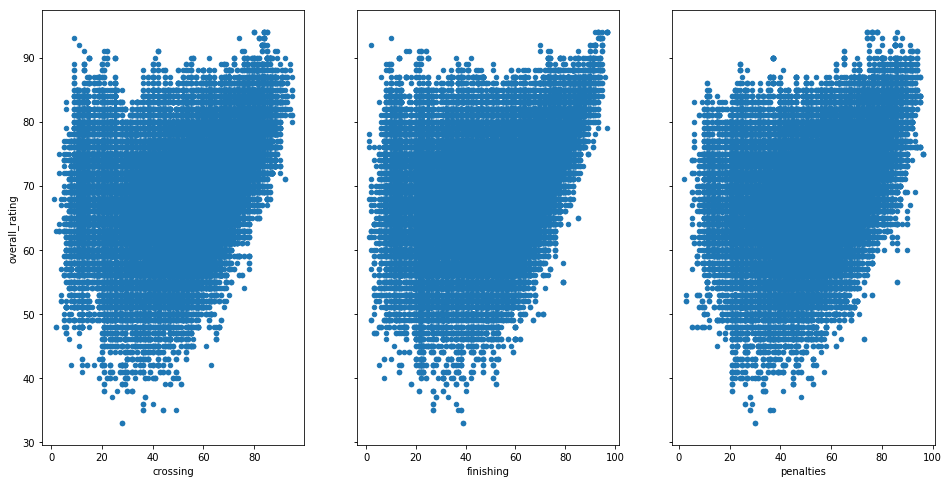

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
PAdf.plot(kind='scatter', x='crossing', y='overall_rating', ax=axs[0], figsize=(16, 8))
PAdf.plot(kind='scatter', x='finishing', y='overall_rating', ax=axs[1])
PAdf.plot(kind='scatter', x='penalties', y='overall_rating', ax=axs[2])

In [9]:
PAdf.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [10]:
#Train Test data split
OR=PAdf.overall_rating
PAdf_train, PAdf_test, OR_train, OR_test = train_test_split(PAdf, OR, test_size=0.3)
print (PAdf_train.shape,PAdf_test.shape)
print (OR_train.shape,OR_test.shape)

(128784, 42) (55194, 42)
(128784,) (55194,)


In [11]:
PAdf.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [12]:
PAdf.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [13]:
#Data processing- One hot encoding
PAdf_Final=pd.get_dummies(data=PAdf, columns=['preferred_foot', 'attacking_work_rate','defensive_work_rate'],drop_first=True)

In [14]:
PAdf_Final.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot_right', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_1', 'defensive_work_rate_2',
       'defensive_work_rate_3', 'defensive_work_rate_4',
       'defensive_work_rate_5', 

In [15]:
PAdf_Final.dtypes

id                              int64
player_fifa_api_id              int64
player_api_id                   int64
date                           object
overall_rating                float64
potential                     float64
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina                       float64
strength                      float64
long_shots                    float64
aggression  

In [16]:
PAdf_Final=PAdf_Final.drop(axis=1,columns=['player_fifa_api_id','curve','date'])

In [17]:

#Droping null values
PAdf_Final.dropna(inplace=True)

In [68]:
PAdf_Final.isna()

,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,free_kick_accuracy,...,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:

OR=PAdf_Final.overall_rating
PAdf_train, PAdf_test, OR_train, OR_test = train_test_split(PAdf_Final, OR, test_size=0.3)
print (PAdf_train.shape,PAdf_test.shape)
print (OR_train.shape,OR_test.shape)

(126885, 51) (54380, 51)
(126885,) (54380,)


In [70]:
X_Train=PAdf_train.drop('overall_rating',axis=1)
Y_Train=OR_train

In [72]:

#importing stats model
import statsmodels.formula.api as smf

In [77]:
X_Train.shape

(126885, 50)

In [78]:
#building the model
X = X_Train
y = Y_Train
PADF_lm=smf.OLS(y, X).fit()

In [79]:
#R2 coeficient of determination
PADF_lm.rsquared

0.9985228879414828

In [80]:
PADF_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.824e+06
Date:                Sun, 07 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:21:13   Log-Likelihood:            -3.0374e+05
No. Observations:              126885   AIC:                         6.076e+05
Df Residuals:                  126838   BIC:                         6.080e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
player_api_id              -7.684e-06   6.74e-08   -114.070      0.000   -7.82e-06   -7.55e-06
potential                      0.4351      0.002    259.617      0.000       0.432       0.438
crossing                       0.0132      0.001     14.165      0.000       0.011       0.015
finishing                      0.0162      0.001     15.447      0.000       0.014       0.018
heading_accuracy               0.0562      0.001     60.645      0.000       0.054       0.058
short_passing                  0.0563      0.002     36.082      0.000       0.053       0.059
volleys                       -0.0046      0.001     -4.998      0.000      -0.006      -0.003
dribbling                      0.0080      0.001      6.023      0.000       0.005       0.011
free_kick_accuracy             0.0109      0.001     14.338      0.000       0.009       0.012
long_passing                   0.0086      0.001      8.062      0.000       0.007       0.011
ball_control                   0.1184      0.002     65.806      0.000       0.115       0.122
acceleration                   0.0078      0.002      4.985      0.000       0.005       0.011
sprint_speed                   0.0145      0.001      9.779      0.000       0.012       0.017
agility                       -0.0140      0.001    -12.319      0.000      -0.016      -0.012
reactions                      0.1804      0.001    143.566      0.000       0.178       0.183
balance                        0.0071      0.001      8.197      0.000       0.005       0.009
shot_power                     0.0135      0.001     13.601      0.000       0.012       0.015
jumping                        0.0112      0.001     13.524      0.000       0.010       0.013
stamina                       -0.0063      0.001     -6.720      0.000      -0.008      -0.004
strength                       0.0487      0.001     54.110      0.000       0.047       0.050
long_shots                    -0.0133      0.001    -12.827      0.000      -0.015      -0.011
aggression                     0.0141      0.001     17.977      0.000       0.013       0.016
interceptions                  0.0064      0.001      7.702      0.000       0.005       0.008
positioning                   -0.0044      0.001     -4.939      0.000      -0.006      -0.003
vision                        -0.0144      0.001    -14.498      0.000      -0.016      -0.012
penalties                      0.0113      0.001     13.253      0.000       0.010       0.013
marking                        0.0264      0.001     20.718      0.000       0.024       0.029
standing_tackle                0.0065      0.001      4.420      0.000       0.004       0.009
sliding_tackle                -0.0197      0.001    -15.740      0.000      -0.022      -0.017
gk_diving                      0.1634      

In [81]:
X_Test=PAdf_test.drop('overall_rating',axis=1)

In [82]:
X_Test.shape

(54380, 50)

In [83]:
#Predicting test data
Y_Pred = PADF_lm.predict(X_Test)

In [89]:
# calculating Root Mean SquareRMSE
print(np.sqrt(metrics.mean_squared_error(OR_test, Y_Pred)))

2.6574962337652606
